In [1]:
import sys; sys.path.append('..')
import warnings; warnings.simplefilter("ignore")
import pandas as pd

In [2]:
user_df = pd.read_csv('../data/Books/Users.csv')

In [3]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
user_df = pd.concat([user_df, user_df["Location"].str.split(', ', expand=True)], axis=1)
drop_cols = ["Location", 3,4,5,6,7,8]
user_df = user_df.drop(drop_cols, axis=1)
user_df = user_df.rename(columns={0: "city", 1: "state", 2: "country"})
user_df.head()

,User-ID,Age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


<AxesSubplot:>

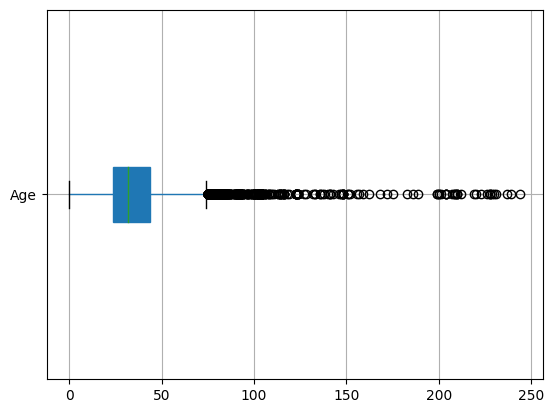

In [5]:
user_df.boxplot(column="Age", vert=False, patch_artist=True)

In [6]:
# 年齢がえらいことになっている。登録時の打ち間違え？
import numpy as np

len_user = len(user_df)
len_user_over_100 =  len(user_df[user_df["Age"] > 100])
len_user_age_is_nan = user_df["Age"].isnull().sum()

print(f"ユーザの数:　　{len_user}")
print(f'100歳以上のレコード数: {len_user_over_100}')

print(f'AgeがNanのレコード数: {len_user_age_is_nan}')
print(f'正しくAgeが入力されているとされるレコードの割合: {(len_user-(len_user_over_100+len_user_age_is_nan))/len_user:.2f}')


ユーザの数:　　278858
100歳以上のレコード数: 366
AgeがNanのレコード数: 110762
正しくAgeが入力されているとされるレコードの割合: 0.60


In [7]:
# 国ごとのユーザ数
user_df.groupby("country").agg({"User-ID": np.sum})

,User-ID
country,
,440721
australia,275708
england,227693
pasig city.,261732
&#20013;&#22269;,272827
...,...
zhengjiang,23884
zimbabwe,3481123
álava,23325


In [8]:
user_df[-1:]["state"].to_list()

['n/a']

In [9]:
len_state_nan = len(user_df[user_df["state"]== "n/a"])
len_city_nan = len(user_df[user_df["city"]== "n/a"])
len_country_nan = len(user_df[user_df["country"]== "n/a"])

print(f"欠損値の数")
print(f'state: {len_state_nan}')
print(f'city: {len_city_nan}')
print(f'country: {len_country_nan}')

欠損値の数
state: 12421
city: 439
country: 78


In [10]:
# stateがわかっていてcountryがわからない場合などは場合によって欠損値を埋めれる??
temp_df = user_df[~((user_df["city"]=="n/a") & (user_df["state"]=="n/a"))]
city_state_country = len(temp_df[temp_df["country"]=="n/a"])

# cityはわかるがstateがわからない場合
city_state = len(user_df[(user_df["city"]!="n/a") & (user_df["state"]=="n/a")])

# すべてがわからない
temp_df = user_df[(user_df["city"]=="n/a") & (user_df["state"]=="n/a")]
all_na = len(temp_df[temp_df["country"]=="n/a"])

# stateはnew yorkなのにcountryはusaではないレコードが存在するから、countryだけを考慮すればいいかな
error_recode = len(user_df[(user_df["state"]=="new york") & (user_df["country"]!="usa")])

print(f"cityはわかるがstateがわからないレコード数: {city_state}")
print(f'cityまたは、stateがわかっていてcountryがわからないレコード数: {city_state_country}')
print(f'すべてがわからないレコード数: {all_na}')
print(f'stateはnew yorkなのにcountryはusaではないレコード数: {error_recode}')


cityはわかるがstateがわからないレコード数: 12150
cityまたは、stateがわかっていてcountryがわからないレコード数: 67
すべてがわからないレコード数: 11
stateはnew yorkなのにcountryはusaではないレコード数: 82


In [11]:
# Locationは欠損値を埋めれる？？

In [12]:
book_df = pd.read_csv('../data/Books/Books.csv')
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [13]:
print(f"レコード数: {len(book_df)}")

レコード数: 271360


In [14]:
# 同じ名前の本があるという紛らわしいこと
book_df.groupby('Book-Title').size().sort_values(ascending=False)

Book-Title
Selected Poems                             27
Little Women                               24
Wuthering Heights                          21
Dracula                                    20
Adventures of Huckleberry Finn             20
                                           ..
Hinds Feet On High Places                   1
Hinds Feet on High Places                   1
Hinds Feet on High Places Women             1
Hindsight: A Novel of the Class of 1972     1
Ã?Â?thique en toc                           1
Length: 242135, dtype: int64

In [15]:
book_df.groupby("Year-Of-Publication").size()

Year-Of-Publication
0                    3570
1806                    1
1900                    1
1901                    7
1902                    2
                     ... 
2024                    1
2030                    3
2037                    1
DK Publishing Inc       2
Gallimard               1
Length: 202, dtype: int64

(1960.0, 2006.0)

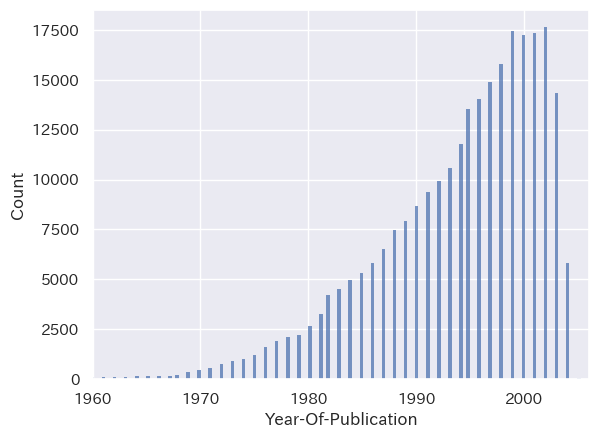

In [16]:
# 西暦ではない後ろの２つは、履歴と一緒にあとで消す、とする。0もどうにかする。
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import japanize_matplotlib
%matplotlib inline

temp_df = book_df[(book_df["Year-Of-Publication"]!="DK Publishing Inc") & (book_df["Year-Of-Publication"]!="Gallimard")]
temp_df = temp_df.astype({"Year-Of-Publication": int})
temp_df = temp_df[temp_df["Year-Of-Publication"]!=0]

pub_dict = temp_df.groupby("Year-Of-Publication").size().to_dict()

sns.histplot(temp_df["Year-Of-Publication"])
plt.xlim(1960,2006)

#figure, ax = plt.subplots()
#x = pub_dict.keys()
#y = pub_dict.values()

#ax.hist(x,y, bins=10)
#ax.set_xlim([1970,2005])
#ax.set_title('年度ごとの本の出版数')
#ax.set_xlabel('西暦')
#ax.set_ylabel('出版数')
                                               

In [17]:
# nullなauthorレコードは一件しかないのでdropする
nan_author_index = book_df[book_df["Book-Author"].isnull()].index
book_df.drop(nan_author_index, inplace=True)

In [18]:
author_size = len(book_df.groupby('Book-Author').size())
print(f"著者の数: {author_size}")

著者の数: 102023


In [19]:
book_df.groupby('Book-Author').size().describe()

count    102023.000000
mean          2.659783
std           7.908872
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         632.000000
dtype: float64

In [20]:
# 最も本を出した著者トップ１０人
book_df.groupby('Book-Author').size().sort_values(ascending=False)[:10]

Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
dtype: int64

Text(0.5, 1.0, '著者の出版数\u3000箱ひげ図')

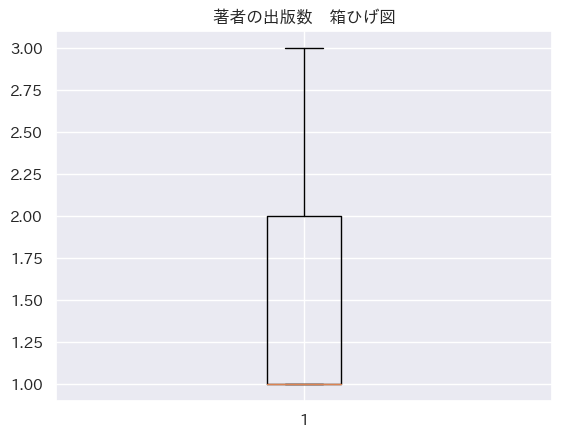

In [21]:
publish_count_list = book_df.groupby('Book-Author').size().to_list()

fig, ax = plt.subplots()

ax.boxplot(publish_count_list, sym="")
ax.set_title('著者の出版数　箱ひげ図')

Text(0, 0.5, '著者の数')

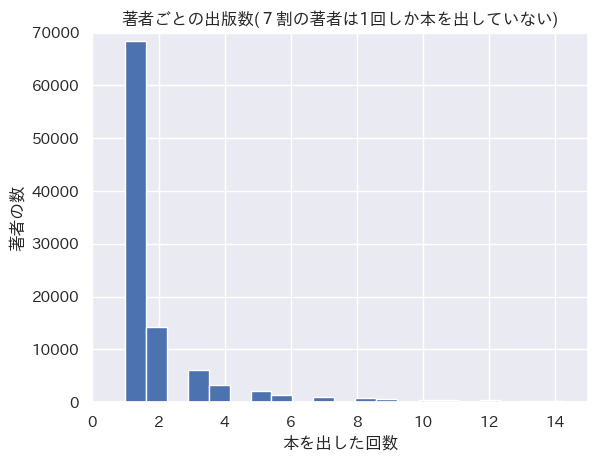

In [22]:
fig, ax = plt.subplots()
ax.hist(x=publish_count_list, bins=1000)
ax.set_xlim(0,15)
ax.set_ylim(0,70000)
ax.set_title('著者ごとの出版数(７割の著者は1回しか本を出していない)')
ax.set_xlabel('本を出した回数')
ax.set_ylabel('著者の数')


In [23]:
nan_publisher_count = len(book_df[book_df["Publisher"].isnull()])
print(f'出版社が不明の数: {nan_publisher_count}')

出版社が不明の数: 2


In [24]:
# nanのレコードは落としておく
nan_publisher_index_list = book_df[book_df["Publisher"].isnull()].index
book_df.drop(nan_publisher_index_list, inplace=True)

In [25]:
publisher_count = len(book_df.groupby("Publisher").size())
print(f"出版社数:　{publisher_count}")

出版社数:　16806


In [26]:
# 最も本を出した出版社トップ１０
book_df.groupby("Publisher").size().sort_values(ascending=False)[:10]

Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
dtype: int64

In [27]:
# 著者と同じくほとんどの出版社は4回しか本を出していない。大企業はごくわずか
book_df.groupby("Publisher").size().describe()

count    16806.000000
mean        16.146436
std        127.884518
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max       7535.000000
dtype: float64

Text(0, 0.5, '出版社の数')

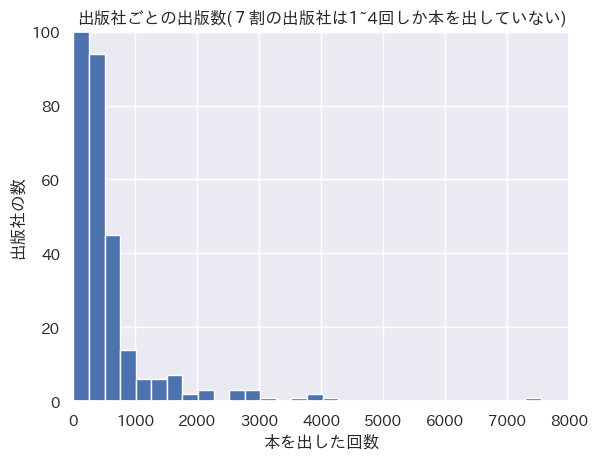

In [28]:
#大企業を分析
publisher_count_list = book_df.groupby('Publisher').size().to_list()

fig, ax = plt.subplots()
ax.hist(x=publisher_count_list, bins=30)
ax.set_xlim(0,8000)
ax.set_ylim(0,100)
ax.set_title('出版社ごとの出版数(７割の出版社は1~4回しか本を出していない)')
ax.set_xlabel('本を出した回数')
ax.set_ylabel('出版社の数')

In [29]:
rating_df = pd.read_csv('../data/Books/Ratings.csv')
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [30]:
# 存在しないISBNがあるのでdrop
dosent_k = list(rating_df.groupby('ISBN').size().sort_values(ascending=False)[-1:].to_dict().keys())[0]
drop_index = rating_df[rating_df["ISBN"]==dosent_k].index
rating_df.drop(drop_index, inplace=True)



In [31]:
len(book_df["ISBN"].unique())

271357

In [32]:
len(rating_df["ISBN"].unique())

340555

In [33]:
# 登録されている本のうち、評価されたことのある本の割合がおかしくなる原因
rating_isbn = set(rating_df["ISBN"].unique())
book_isbn = set(book_df["ISBN"].to_list())
diff_isbn = list(rating_isbn.difference(book_isbn))
print(f"book_dfにはないISBNがrating_dfにある数: {len(diff_isbn)}")


book_dfにはないISBNがrating_dfにある数: 70407


In [34]:
#廃番になった本が履歴に混ざっていると見当がつく。強調系のtrainデータとしては使えるのでとりあえず残しておく

In [35]:
print(f'レコード数: {len(rating_df)}')
print(f'評価したユーザー数: {len(rating_df["User-ID"].unique())}')
print(f'評価されたアイテム数: {len(rating_df["ISBN"].unique())}')
print('----------------------------------------------')
print(f'登録されているユーザのうち、評価をしたことがあるユーザの割合: {len(rating_df["User-ID"].unique())/len(user_df):.2f}')
print(f'登録されている本のうち、評価されたことのある本の割合: {len(rating_df["ISBN"].unique())/len(book_df):.2f}')


レコード数: 1149779
評価したユーザー数: 105283
評価されたアイテム数: 340555
----------------------------------------------
登録されているユーザのうち、評価をしたことがあるユーザの割合: 0.38
登録されている本のうち、評価されたことのある本の割合: 1.26


In [36]:
rating_df[rating_df["Book-Rating"].isnull()]

,User-ID,ISBN,Book-Rating


Implicit FeedBackの割合: 0.62


Text(0, 0.5, '数')

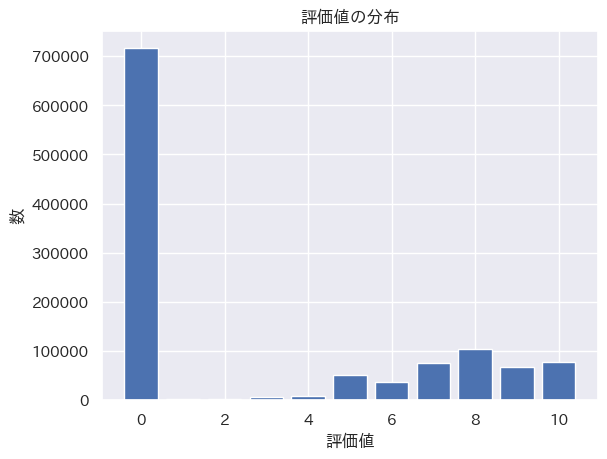

In [37]:
rating_count_dict = rating_df.groupby('Book-Rating').size().to_dict()

print(f'Implicit FeedBackの割合: {rating_count_dict[0]/len(rating_df):.2f}')

fig, ax = plt.subplots()
ax.bar(rating_count_dict.keys(), rating_count_dict.values())
ax.set_title('評価値の分布')
ax.set_xlabel('評価値')
ax.set_ylabel('数')

In [38]:
# implicitとexplicitを分けて考える必要がある
# implicit(評価値0)はclickなのか、nanがアノテーションされたのか、後で調査

Text(0.5, 1.0, 'explicit feedback確率変数に従う離散分布')

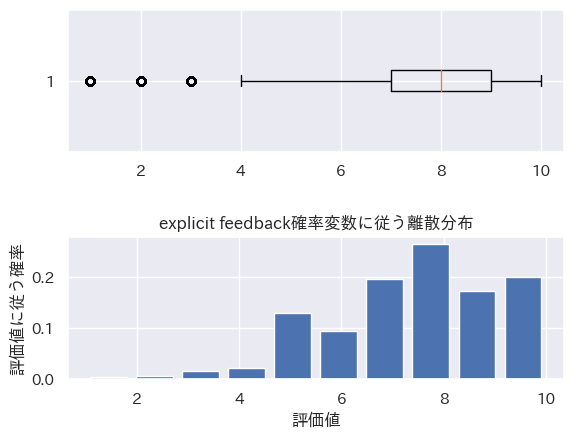

In [39]:
explicit_list = rating_df[rating_df["Book-Rating"]!=0]["Book-Rating"].to_list()
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.4)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.boxplot(explicit_list, vert=False)
ax2.hist(explicit_list, density=True, rwidth=0.8)
ax2.set_xlabel('評価値')
ax2.set_ylabel('評価値に従う確率')
ax2.set_title('explicit feedback確率変数に従う離散分布')

In [40]:
# ユーザが能動的に評価値を与えるときは高いスコアをつける傾向がある。

In [59]:
# user, bookの情報を加えてexplicit feedbackを分析してみる。
# 廃番になったとされる本とuser_dfでnanがあるレコードはとりあえず省く
# Ageが100以降のレコードもdrop

# yearがおかしいレコードも評価がないので落とす


df = pd.merge(rating_df, user_df, on="User-ID")
df = pd.merge(df, book_df, on="ISBN", how="right")
df = df[(~df["Age"].isnull()) & (df["Age"] < 100)]
df = df[(df["city"]!="n/a") & (df["state"]!="n/a") & (df["country"]!="n/a")]

df = df[df["Year-Of-Publication"]!="Gallimard"]

df = df.astype({"User-ID": np.int64})
explicit_df = df[df["Book-Rating"]!=0].reset_index(drop=True)

explicit_df.head()

,User-ID,ISBN,Book-Rating,Age,city,state,country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,67544,0002005018,8.0,30.0,toronto,ontario,canada,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
1,219008,0002005018,7.0,60.0,halifax,nova scotia,canada,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,263325,0002005018,6.0,27.0,fredericton,new brunswick,canada,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,2954,0060973129,8.0,71.0,wichita,kansas,usa,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
4,152827,0060973129,7.0,40.0,ottawa,ontario,canada,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [69]:
np.median(explicit_df.groupby("ISBN")["Book-Rating"].median())

8.0